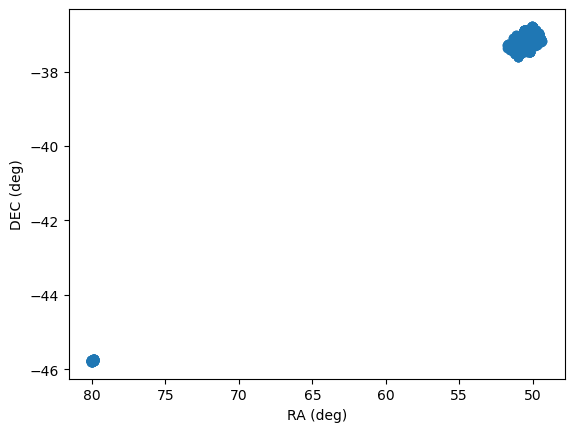

In [1]:
  >>> import os
  >>> import numpy as np
  >>> import matplotlib.pyplot as plt # doctest: +SKIP
  >>> from pyradiosky import SkyModel
  >>> from pyradiosky.data import DATA_PATH
  >>> sm = SkyModel()

  >>> # This is a small FHD save file that contains extended source models
  >>> # for Fornax A and Pictor A. The two lobes of Fornax are identified
  >>> # as separate sources
  >>> filename = os.path.join(DATA_PATH, "fhd_catalog_with_beam_values.sav")
  >>> sm.read_fhd_catalog(filename)

  >>> # First, let's just plot the location of all the components
  >>> plt.scatter(sm.ra, sm.dec) # doctest: +SKIP
  >>> plt.xlabel("RA (deg)") # doctest: +SKIP
  >>> plt.ylabel("DEC (deg)") # doctest: +SKIP
  >>> # for RA to be in conventional order, use .value when integer required
  >>> plt.xlim(max(sm.ra.value), min(sm.ra.value)) # doctest: +SKIP
  >>> # extends axis limits 5% beyond given limits
  >>> plt.autoscale() # doctest: +SKIP
  >>> plt.show() # doctest: +SKIP



In [2]:

  >>> print(sm.Ncomponents)
  # 4597
  >>> print(sm.Nfreqs)
  # 1
  >>> print(sm.component_type)
  # point
  >>> print(sm.spectral_type)
  # spectral_index
  >>> print(np.unique(sm.reference_frequency))
  # [1.82435e+08 2.15675e+08] Hz
  >>> print(np.unique(sm.spectral_index))
  # [-0.8]
  >>> print(np.unique(sm.extended_model_group))
  # ['32768' '32769' '32770']
  >>> # beam amplitude for stokes parameter index = 0 (stokes I or unpolarized), Nfreqs index = 0 (first and only frequency
  >>> # since Nfreqs = 1 for spectral index type), Ncomponents index = : (all components)
  >>> print(np.unique(sm.beam_amp[0,0,:]))
  # [0.12874769 0.56623143 0.59106636]


4597
1
point
spectral_index
[1.82435e+08 2.15675e+08] Hz
[-0.8]
['32768' '32769' '32770']
[0.12874769 0.56623143 0.59106636]


In [3]:
  >>> # Use `calc_frame_coherency` to calculate and optionally save it on the object
  >>> # default is `store=True` which will save it on the object rather than returning it
  >>> sm.calc_frame_coherency()
  >>> # coherency (2 x 2 matrix of electric field correlation) for polarization1 index = 0 (North),
  >>> # polarization2 index = 0 (North), Nfreqs index = 0 (first and only frequency since Nfreqs = 1 for
  >>> # spectral index type), Ncomponents index = 0 (first component)
  >>> print(sm.frame_coherency[0,0,0,0])
  # (8.400908470153809+0j) Jy


(8.400908470153809+0j) Jy


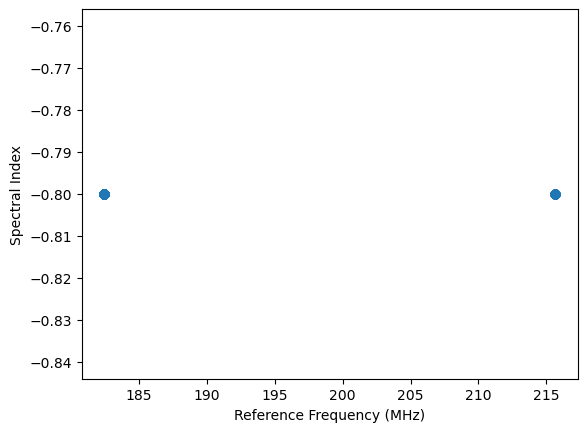

In [4]:
  >>> plt.scatter(sm.reference_frequency.to("MHz").value, sm.spectral_index) # doctest: +SKIP
  >>> plt.xlabel("Reference Frequency (MHz)") # doctest: +SKIP
  >>> plt.ylabel("Spectral Index") # doctest: +SKIP
  >>> plt.show() # doctest: +SKIP


In [5]:

  >>> print(np.unique(sm.extended_model_group))
  # ['32768' '32769' '32770']
  >>> index_32768 = np.nonzero(sm.extended_model_group == "32768")[0]

  >>> # confirming that there is one reference frequency for this extended model group
  >>> print(np.unique(sm.reference_frequency[index_32768]))
  # [2.15675e+08] Hz


['32768' '32769' '32770']
[2.15675e+08] Hz


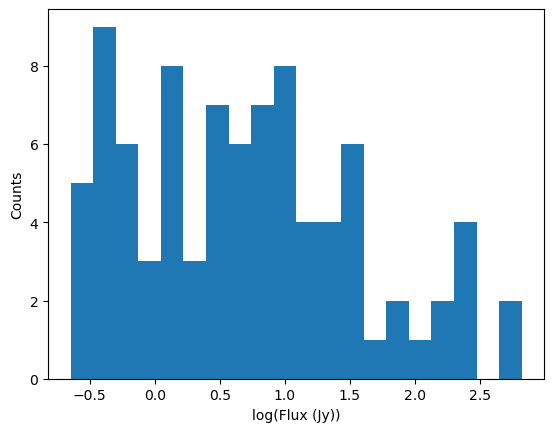

In [6]:

  >>> # plots of fluxes are sensible at one frequency since fluxes can change with frequency, plots below provide fluxes
  >>> # when frequency = reference frequency (more on this in at_frequencies section)

  >>> # log taken since these fluxes have different orders of magnitude
  >>> plt.hist(np.log(sm.stokes.value[0,0,index_32768]), bins=20) # doctest: +SKIP
  >>> plt.xlabel("log(Flux (Jy))") # doctest: +SKIP
  >>> plt.ylabel("Counts") # doctest: +SKIP
  >>> plt.show() # doctest: +SKIP


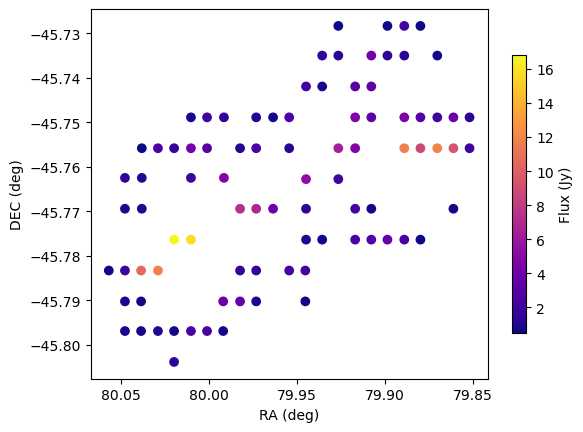

In [7]:

  >>> plt.scatter(x=sm.ra[index_32768],y=sm.dec[index_32768],c=sm.stokes[0,0,index_32768],cmap="plasma") # doctest: +SKIP
  >>> cbar=plt.colorbar(label="Flux (Jy)", orientation="vertical",shrink=.75) # doctest: +SKIP
  >>> plt.xlim(max(sm.ra.value[index_32768]), min(sm.ra.value[index_32768])) # doctest: +SKIP
  >>> plt.autoscale() # doctest: +SKIP
  >>> plt.xlabel("RA (deg)") # doctest: +SKIP
  >>> plt.ylabel("DEC (deg)") # doctest: +SKIP
  >>> plt.show() # doctest: +SKIP

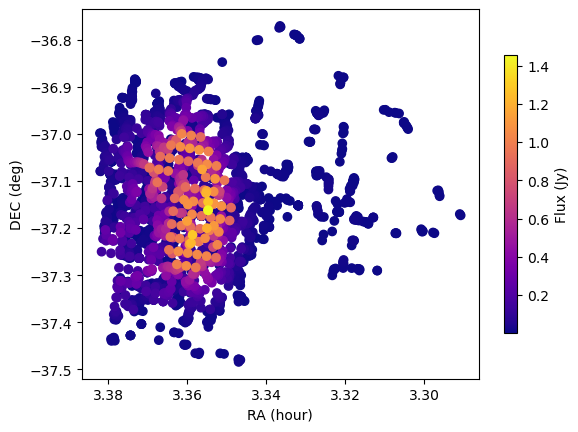

In [10]:
  >>> index_32769 = np.flip(np.nonzero(sm.extended_model_group == "32769")[0])
  >>> plt.scatter(x=sm.ra[index_32769].to("hourangle"),y=sm.dec[index_32769],c=sm.stokes[0,0,index_32769],cmap="plasma") # doctest: +SKIP
  >>> cbar=plt.colorbar(label="Flux (Jy)", orientation="vertical",shrink=.75) # doctest: +SKIP
  >>> plt.xlim(max(sm.ra.value[index_32768]), min(sm.ra.value[index_32768])) # doctest: +SKIP
  >>> plt.autoscale() # doctest: +SKIP
  >>> plt.xlabel("RA (hour)") # doctest: +SKIP
  >>> plt.ylabel("DEC (deg)") # doctest: +SKIP
  >>> plt.show() # doctest: +SKIP

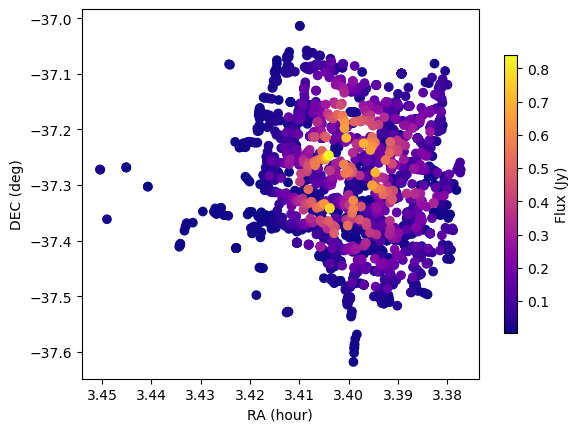

In [9]:
  >>> index_32770 = np.flip(np.nonzero(sm.extended_model_group == "32770")[0])
  >>> plt.scatter(x=sm.ra[index_32770].to("hourangle"),y=sm.dec[index_32770],c=sm.stokes[0,0,index_32770],cmap="plasma") # doctest: +SKIP
  >>> cbar=plt.colorbar(label="Flux (Jy)", orientation="vertical",shrink=.75) # doctest: +SKIP
  >>> plt.xlim(max(sm.ra.value[index_32768]), min(sm.ra.value[index_32768])) # doctest: +SKIP
  >>> plt.autoscale() # doctest: +SKIP
  >>> plt.xlabel("RA (hour)") # doctest: +SKIP
  >>> plt.ylabel("DEC (deg)") # doctest: +SKIP
  >>> plt.show() # doctest: +SKIP